/Users/luke/anaconda/envs/qiime190/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


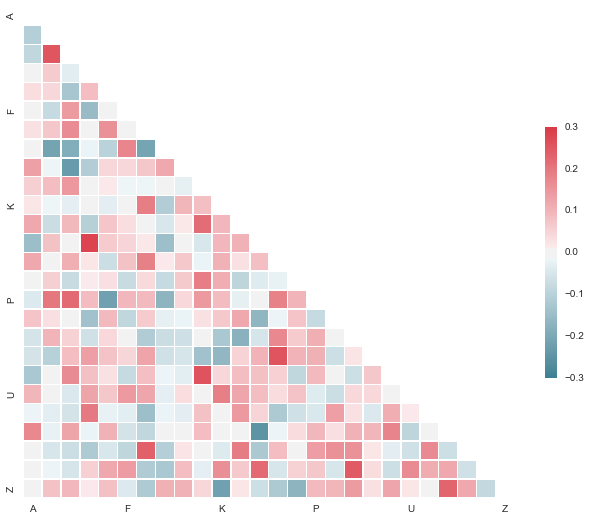

In [1]:
%matplotlib inline
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [2]:
from scipy.stats.stats import pearsonr

In [3]:
df_metadata = pd.read_csv('~/krse2011/db/krse2011_v5_metadata.csv')

In [5]:
params = df_metadata.columns[6:15]

In [6]:
df_pearson = pd.DataFrame(0.0, params, params)

In [7]:
for x in params:
    for y in params:
        df_pearson[x][y] = pearsonr(df_metadata[x], df_metadata[y])[0]

In [8]:
df_pearson

,depth,temperature,salinity,oxygen,fluorescence,turbidity,nitrate,phosphate,silicate
depth,1.000000,-0.741523,0.472889,-0.807966,-0.156768,-0.496162,0.819898,0.721308,0.775187
temperature,-0.741523,1.000000,-0.332932,0.794018,-0.244893,0.302637,-0.800616,-0.738702,-0.769880
salinity,0.472889,-0.332932,1.000000,-0.089328,-0.574253,-0.769554,0.098381,-0.059215,0.060730
oxygen,-0.807966,0.794018,-0.089328,1.000000,-0.162774,0.139179,-0.972497,-0.956193,-0.942228
fluorescence,-0.156768,-0.244893,-0.574253,-0.162774,1.000000,0.641099,0.175021,0.307055,0.150997
turbidity,-0.496162,0.302637,-0.769554,0.139179,0.641099,1.000000,-0.157729,0.000043,-0.124741
nitrate,0.819898,-0.800616,0.098381,-0.972497,0.175021,-0.157729,1.000000,0.968214,0.954963
phosphate,0.721308,-0.738702,-0.059215,-0.956193,0.307055,0.000043,0.968214,1.000000,0.946931
silicate,0.775187,-0.769880,0.060730,-0.942228,0.150997,-0.124741,0.954963,0.946931,1.000000


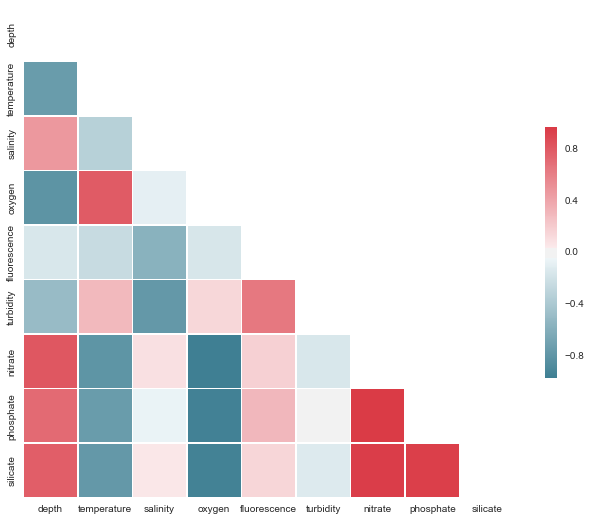

In [9]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_pearson, mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [10]:
plt.savefig('pearson.pdf')